# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Nauval Almas
- **Email:** nauvalalmas@gmail.com
- **ID Dicoding:** valalmas

##Menentukan Pertanyaan Bisnis


---

1. Bagaimana Pola Penggunaan Sepeda Berubah Berdasarkan Waktu (Hari, Bulan, dan Musim)?
2. Bagaimana Pengaruh Hari Kerja vs. Akhir Pekan dan Faktor Cuaca terhadap Jumlah Sewa Sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Data Wrangling

###Gathering Data

In [3]:
!cd /content
!mkdir -p 'Bike-sharing-dataset'

In [4]:
!pip install gdown
!gdown --id 1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ -O '/content/Bike-sharing-dataset/bike-share-dataset.zip'

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
To: /content/Bike-sharing-dataset/bike-share-dataset.zip
100% 280k/280k [00:00<00:00, 26.4MB/s]


In [5]:
!file /content/Bike-sharing-dataset/bike-share-dataset.zip

/content/Bike-sharing-dataset/bike-share-dataset.zip: Zip archive data, at least v2.0 to extract, compression method=deflate


In [6]:
import zipfile
with zipfile.ZipFile('/content/Bike-sharing-dataset/bike-share-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Bike-sharing-dataset')
!ls /content/Bike-sharing-dataset

bike-share-dataset.zip	day.csv  hour.csv  Readme.txt


In [7]:
day_df  = pd.read_csv("/content/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
hour_df  = pd.read_csv("/content/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##Assessing Data

###Day

In [9]:
day_df.info()
print("\nDuplicated Data: {}\n\nMissing value:\n{}".format(day_df.duplicated().sum(), day_df.isna().sum()))
day_max_values = day_df.max()
print(f"\nMax value:\n{day_max_values}\n")
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Duplicated Data: 0

Missing value:
instant       0
dteday        0
season        0
yr       

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


###Hour

In [10]:
hour_df.info()
print("\nDuplicated Data : {}\n\nMissing value:\n{}".format(hour_df.duplicated().sum(), hour_df.isna().sum()))
hour_max_values = hour_df.max()
print(f"\nMax value:\n{hour_max_values}\n")
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

Duplicated Data : 0

Missing value:
instant     

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada data yang terduplikat
- Tidak ada missing value di kedua dataset


##Cleaning Data

In [12]:
unique_col_day = [column for column in day_df.columns if day_df[column].nunique() == len(day_df)]
unique_col_hour = [column for column in hour_df.columns if hour_df[column].nunique() == len(hour_df)]
print(f"Unnecessary feature:\nDay dataframe:{unique_col_day}\nHour Dataframe:{unique_col_hour}")

Unnecessary feature:
Day dataframe:['instant', 'dteday']
Hour Dataframe:['instant']


###Drop Kolom

In [13]:
day = day_df.drop(['instant', 'dteday'],axis=1)
hour = hour_df.drop(['instant'],axis=1)

###Mengubah Nama Kolom

In [21]:
day.rename(columns={'dteday':'date','yr':'year','mnth':'month','weekday':'day_of_the_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)
hour.rename(columns={'dteday':'date','yr':'year','mnth':'month','weekday':'day_of_the_week','hr':'hour','weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

###Mengubah Tipe Data

In [16]:
hour["dteday"] = pd.to_datetime(hour["dteday"])
day["dteday"] = pd.to_datetime(day["dteday"])

In [19]:
day['season'] = day.season.astype('category')
day['holiday'] = day.holiday.astype('category')
day['day_of_the_week'] = day.day_of_the_week.astype('category')
day['weather_situation'] = day.weather_situation.astype('category')
day['workingday'] = day.workingday.astype('category')
day['month'] = day.month.astype('category')

In [23]:
hour['season'] = hour.season.astype('category')
hour['holiday'] = hour.holiday.astype('category')
hour['day_of_the_week'] = hour.day_of_the_week.astype('category')
hour['weather_situation'] = hour.weather_situation.astype('category')
hour['workingday'] = hour.workingday.astype('category')
hour['month'] = hour.month.astype('category')

###Mengkonversi data kategori agar lebih sesuai

In [37]:
def replace_values(df, replacements):
    for column, mapping in replacements.items():
        if column in df.columns:
            df[column] = df[column].cat.rename_categories(mapping)
    return df

replacements = {
    'season': {1:"spring", 2:"summer", 3:"fall", 4:"winter"},
    'weather_situation': {1:'good', 2:'moderate', 3:'bad'},
    'month': {1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sept', 10:'oct', 11:'nov', 12:'dec'},
    'day_of_the_week': {0:'sun', 1:'mon', 2: 'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'}
}

hour = replace_values(hour, replacements)
day = replace_values(day, replacements)
hour.head()
day.head()

,season,year,month,holiday,day_of_the_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
0,spring,0,jan,0,sat,0,moderate,0.344167,0.363625,0.805833,0.160446,331,654,985
1,spring,0,jan,0,sun,0,moderate,0.363478,0.353739,0.696087,0.248539,131,670,801
2,spring,0,jan,0,mon,1,good,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,spring,0,jan,0,tue,1,good,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,spring,0,jan,0,wed,1,good,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [38]:
print("Day Dataframe Info:\n")
day.info()
print("\n\nHour Dataframe Info:\n")
hour.info()

Day Dataframe Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   season             731 non-null    category
 1   year               731 non-null    int64   
 2   month              731 non-null    category
 3   holiday            731 non-null    category
 4   day_of_the_week    731 non-null    category
 5   workingday         731 non-null    category
 6   weather_situation  731 non-null    category
 7   temp               731 non-null    float64 
 8   atemp              731 non-null    float64 
 9   humidity           731 non-null    float64 
 10  wind_speed         731 non-null    float64 
 11  casual             731 non-null    int64   
 12  registered         731 non-null    int64   
 13  count_cr           731 non-null    int64   
dtypes: category(6), float64(4), int64(4)
memory usage: 51.4 KB


Hour Dataframe Info:

<c

**Insight:**
- Sudah menghapus kolom instant dan dteday
- Sudah mengganti nama kolom agar lebih mudah dibaca
- Tipe data pada kolom dteday sudah berubah menjadi datetime
- Tipe data int pada season, mnth, holiday, weekday, workingday, weathersit sudah berubah menjadi tipe data category
- Sudah Mengkonversi isi kolom agar mudah dipahami

#Exploratory Data Analysis

##Distribution & Correlation

In [84]:
day.describe(include="all")

,season,year,month,holiday,day_of_the_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,day_type,temp_group
count,731,731.000000,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,4,NaN,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,fall,NaN,jan,0.0,sun,1.0,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday,Sedang
freq,188,NaN,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,522,342
mean,NaN,0.500684,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
std,NaN,0.500342,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN


In [85]:
hour.describe(include="all")

,date,season,year,month,hour,holiday,day_of_the_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,day_type,temp_group
count,17379,17379,17379.000000,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,731,17379
unique,731,4,NaN,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,2011-01-01,fall,NaN,may,NaN,0.0,sat,1.0,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday,Sedang
freq,24,4496,NaN,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,522,8030
mean,NaN,NaN,0.502561,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN,NaN
std,NaN,NaN,0.500008,NaN,6.914405,NaN,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,NaN,NaN
min,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,NaN,NaN,1.000000,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,NaN,NaN,1.000000,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN,NaN


In [88]:
hour.groupby(by="hour").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hour,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


In [73]:
hour.info()
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   date               17379 non-null  object  
 1   season             17379 non-null  category
 2   year               17379 non-null  int64   
 3   month              17379 non-null  category
 4   hour               17379 non-null  int64   
 5   holiday            17379 non-null  category
 6   day_of_the_week    17379 non-null  category
 7   workingday         17379 non-null  category
 8   weather_situation  17379 non-null  category
 9   temp               17379 non-null  float64 
 10  atemp              17379 non-null  float64 
 11  humidity           17379 non-null  float64 
 12  wind_speed         17379 non-null  float64 
 13  casual             17379 non-null  int64   
 14  registered         17379 non-null  int64   
 15  count_cr           17379 non-null  int64   
dtypes: c

In [89]:
day.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)

<ipython-input-89-301ed85a0bb6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)


,season,count_cr
0,fall,1061129
1,summer,918589
2,winter,841613
3,spring,471348


#Cuaca & Kondisi

<ipython-input-90-f31ca4617438>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_data_day = day.groupby('weather_situation')['count_cr'].mean().reset_index()


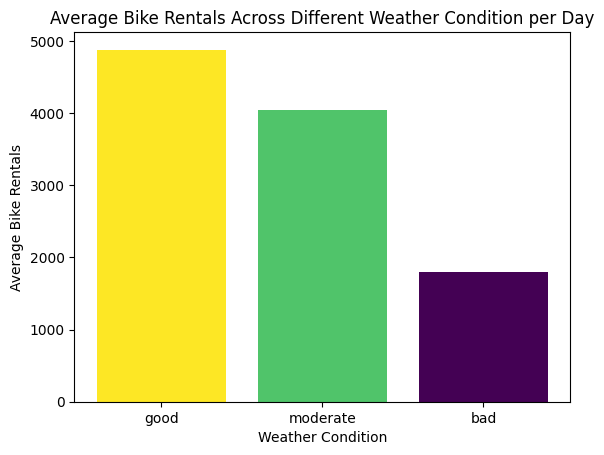

<ipython-input-90-f31ca4617438>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_data_hour = day.groupby('weather_situation')['count_cr'].mean().reset_index()


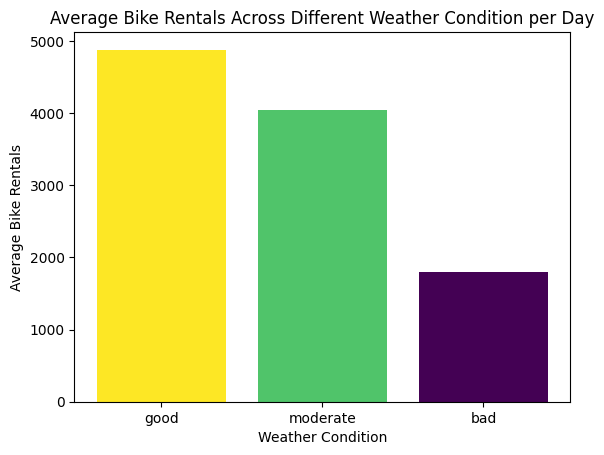

In [90]:
weather_data_day = day.groupby('weather_situation')['count_cr'].mean().reset_index()
weather_data_day['norm_cnt'] = (weather_data_day['count_cr'] - weather_data_day['count_cr'].min()) / (weather_data_day['count_cr'].max() - weather_data_day['count_cr'].min())

cmap = plt.get_cmap('viridis')
for i, row in weather_data_day.iterrows():
    plt.bar(row['weather_situation'], row['count_cr'], color=cmap(row['norm_cnt']))

plt.title('Average Bike Rentals Across Different Weather Condition per Day')
plt.xlabel('Weather Condition')
plt.ylabel('Average Bike Rentals')
plt.xticks(weather_data_day['weather_situation'])
plt.show()

weather_data_hour = day.groupby('weather_situation')['count_cr'].mean().reset_index()
weather_data_hour['norm_cnt'] = (weather_data_hour['count_cr'] - weather_data_hour['count_cr'].min()) / (weather_data_hour['count_cr'].max() - weather_data_hour['count_cr'].min())

cmap = plt.get_cmap('viridis')
for i, row in weather_data_hour.iterrows():
    plt.bar(row['weather_situation'], row['count_cr'], color=cmap(row['norm_cnt']))

plt.title('Average Bike Rentals Across Different Weather Condition per Day')
plt.xlabel('Weather Condition')
plt.ylabel('Average Bike Rentals')
plt.xticks(weather_data_hour['weather_situation'])
plt.show()

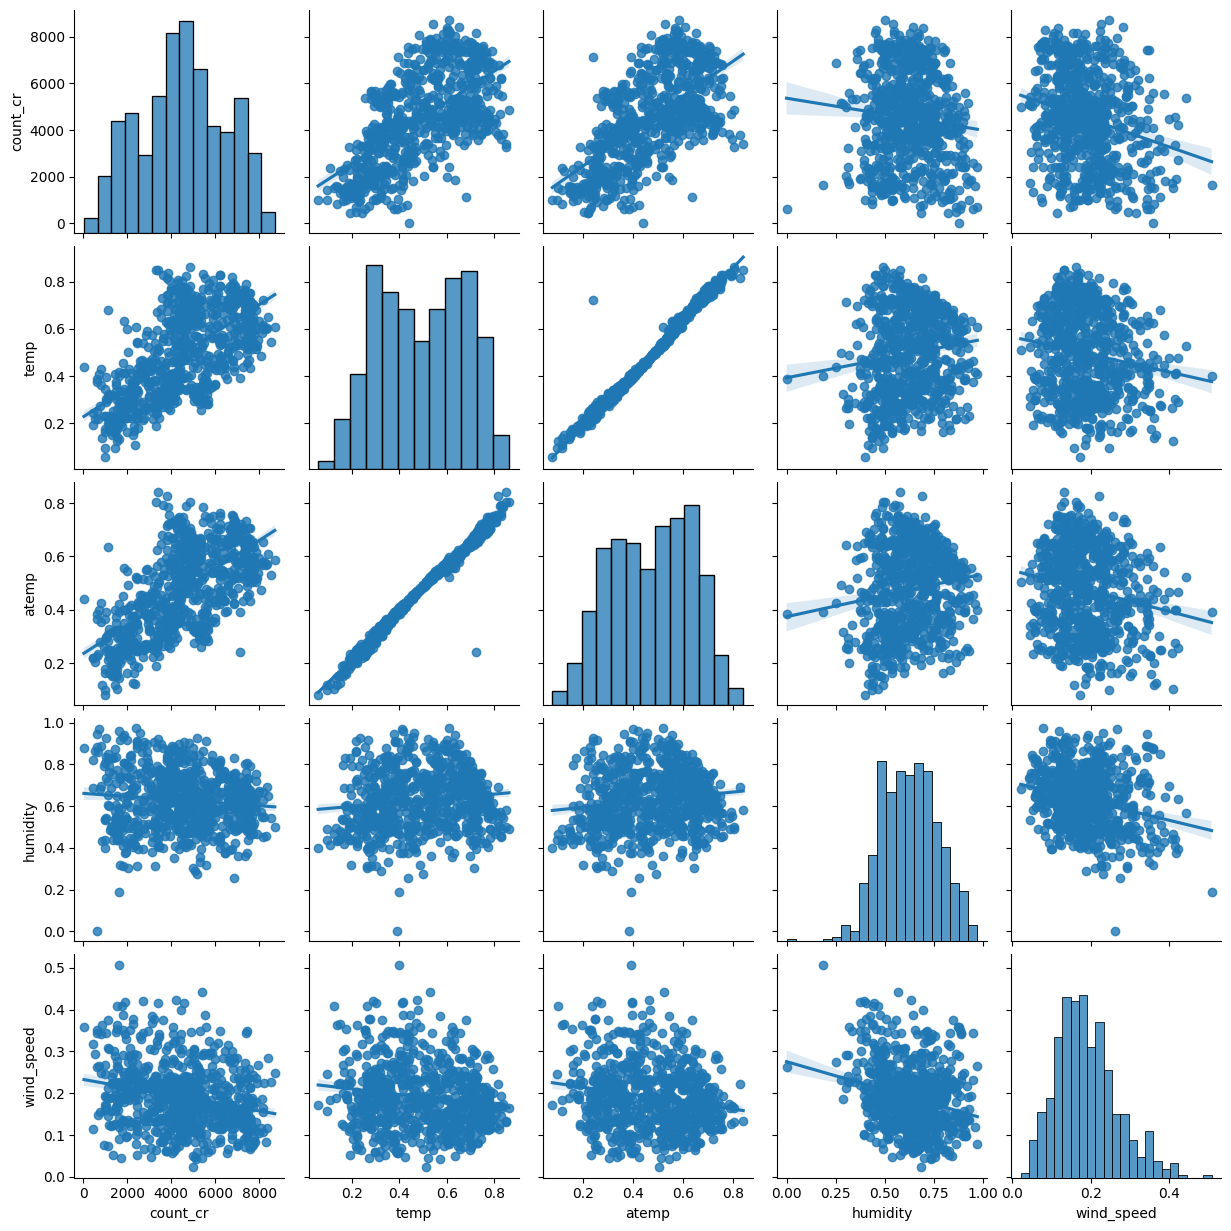

In [47]:
num_variable = ['count_cr','temp', 'atemp', 'humidity', 'wind_speed']
sns.pairplot (data=day, vars=num_variable, kind='reg')
plt.show()


**Insight Dari Grafik-Grafik di Atas :**
- Tidak ada outlier pada variabel temp, atemp, hum, dan kecepatan angin
- Fitur temp dan atemp sangat berkorelasi
- Tidak ada (4) kondisi cuaca buruk yang terjadi dalam kerangka data harian
- Kondisi cuaca buruk hanya terjadi pada musim semi: 1 kali pada tahun 2011, dan 2 kali pada tahun 2012

In [55]:
flteredHour_df = hour_df[hour_df['weathersit'] == 4]
flteredDay_df = day_df[day_df['weathersit'] == 4]
# Display the filtered DataFrame
print(f"Day:\n{flteredDay_df}\n\nHour:\n{flteredHour_df}")

Day:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Hour:
      instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
585       586  2011-01-26       1   0     1  16        0        3           1   
8854     8855  2012-01-09       1   1     1  18        0        1           1   
9123     9124  2012-01-21       1   1     1   1        0        6           0   

      weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
585            4  0.22  0.1970  0.93     0.3284       1          35   36  
8854           4  0.20  0.2273  0.86     0.0896       6         158  164  
9123           4  0.14  0.1364  0.86     0.1940       1          22   23  


###All through the Week

In [53]:
day['day_type'] = day_df['weekday'].apply(lambda x: 'weekday' if (x >=1 and x<6) else 'weekend')

average_rentals = day.groupby('day_type')['count_cr'].mean()
print(average_rentals)

day_type
weekday    4550.566219
weekend    4389.685714
Name: count_cr, dtype: float64


In [57]:
from scipy.stats import ttest_ind

weekday_rentals = day[day['day_type'] == 'weekday']['count_cr']
weekend_rentals = day[day['day_type'] == 'weekend']['count_cr']

t_stat, p_value = ttest_ind(weekday_rentals, weekend_rentals)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.5f}")

T-statistic: 1.02
P-value: 0.30995


**Insight:**

  Dari uji T di atas menunjukkan bahwa tidak terdapat perbedaan yang signifikan secara statistik rata-rata jumlah sewa sepeda antara hari kerja dan akhir pekan. Nilai p sebesar 0,30995 lebih besar dari ambang batas yang umum digunakan yaitu 0,05, yang menunjukkan bahwa perbedaan yang diamati dalam jumlah sewa antara hari kerja dan akhir pekan bisa saja terjadi secara kebetulan. Oleh karena itu, perbedaan jumlah penyewaan sepeda pada hari kerja dan akhir pekan tidak cukup besar untuk dianggap signifikan secara statistik berdasarkan data yang dianalisis.

##Visualisasi Data

###1. Bagaimana pola sewa sepeda berubah berdasarkan waktu (hari, bulan, musim)?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

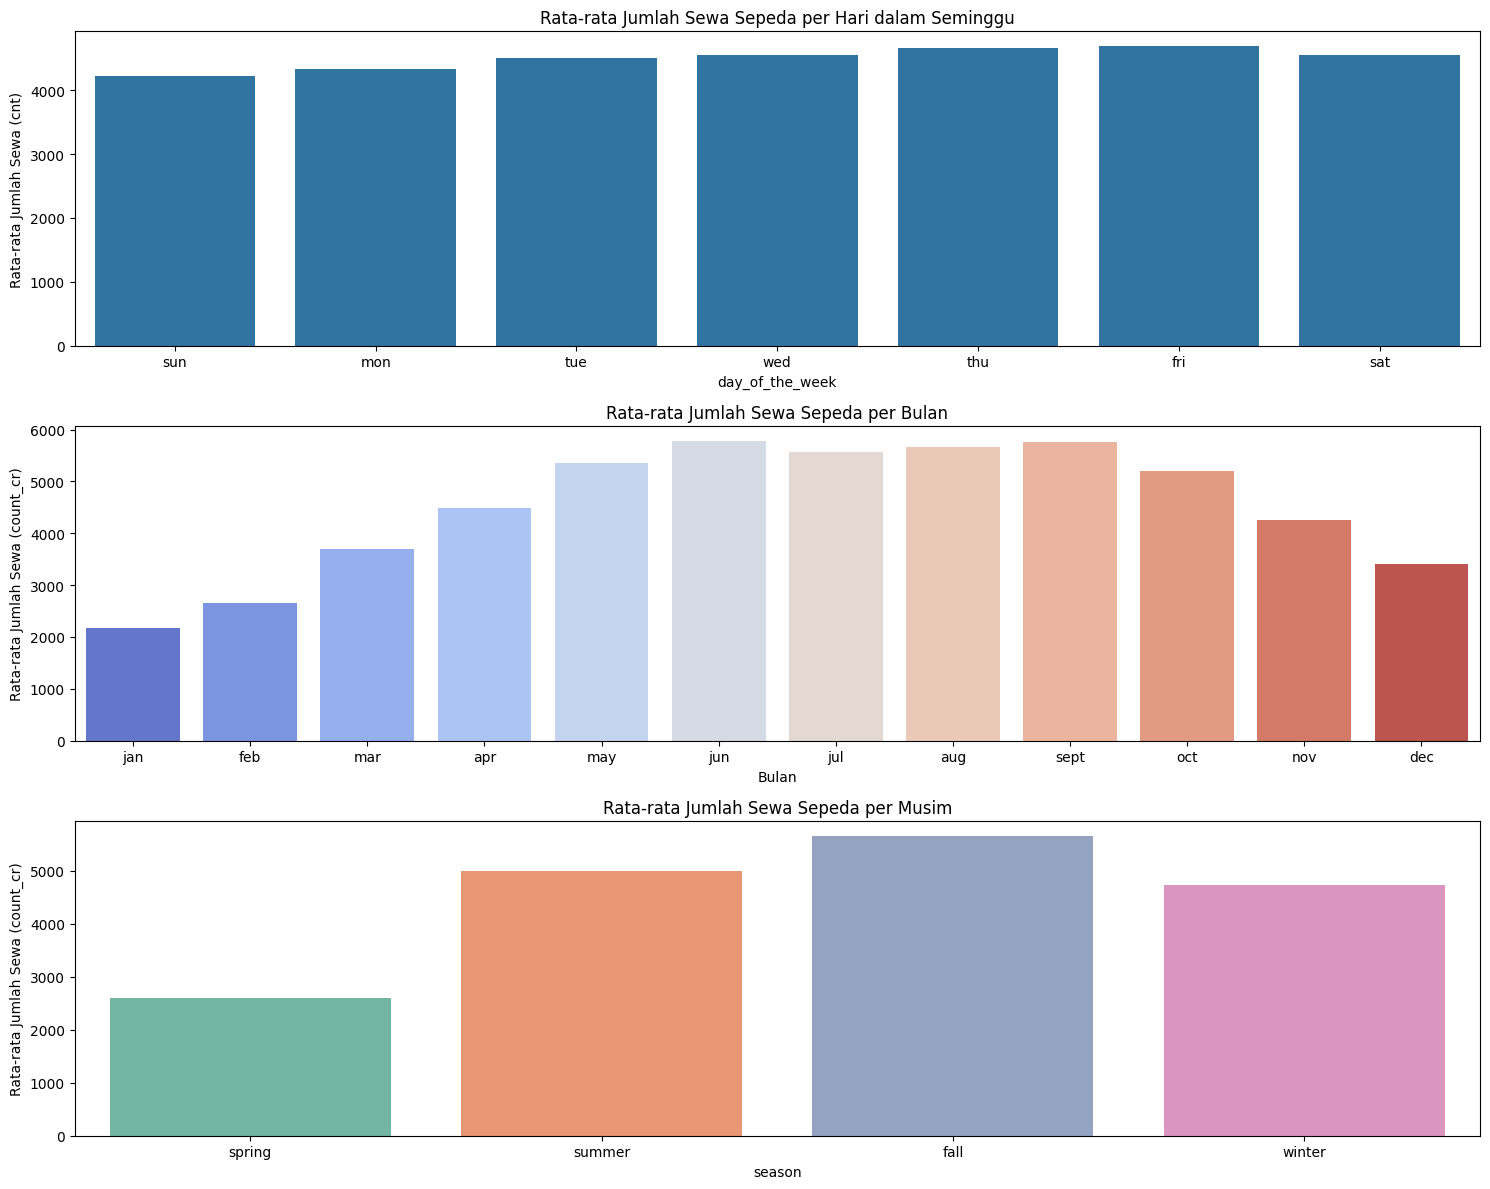

In [65]:
# Mengatur ukuran plot
plt.figure(figsize=(15, 12))

# Visualisasi 1: Rata-rata Sewa Sepeda berdasarkan Hari dalam Seminggu
plt.subplot(3, 1, 1)
sns.barplot(data=day, x='day_of_the_week', y='count_cr', errorbar=None)
plt.title('Rata-rata Jumlah Sewa Sepeda per Hari dalam Seminggu')
plt.ylabel('Rata-rata Jumlah Sewa (cnt)')

# Visualisasi 2: Rata-rata Sewa Sepeda berdasarkan Bulan
plt.subplot(3, 1, 2)
sns.barplot(data=day, x='month', y='count_cr', errorbar=None, hue='month', palette='coolwarm', legend=False)
plt.title('Rata-rata Jumlah Sewa Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Sewa (count_cr)')

# Visualisasi 3: Rata-rata Sewa Sepeda berdasarkan Musim
plt.subplot(3, 1, 3)
sns.barplot(data=day, x='season', y='count_cr', errorbar=None, hue='season', palette='Set2', legend=False)
plt.title('Rata-rata Jumlah Sewa Sepeda per Musim')
plt.ylabel('Rata-rata Jumlah Sewa (count_cr)')

# Menampilkan plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

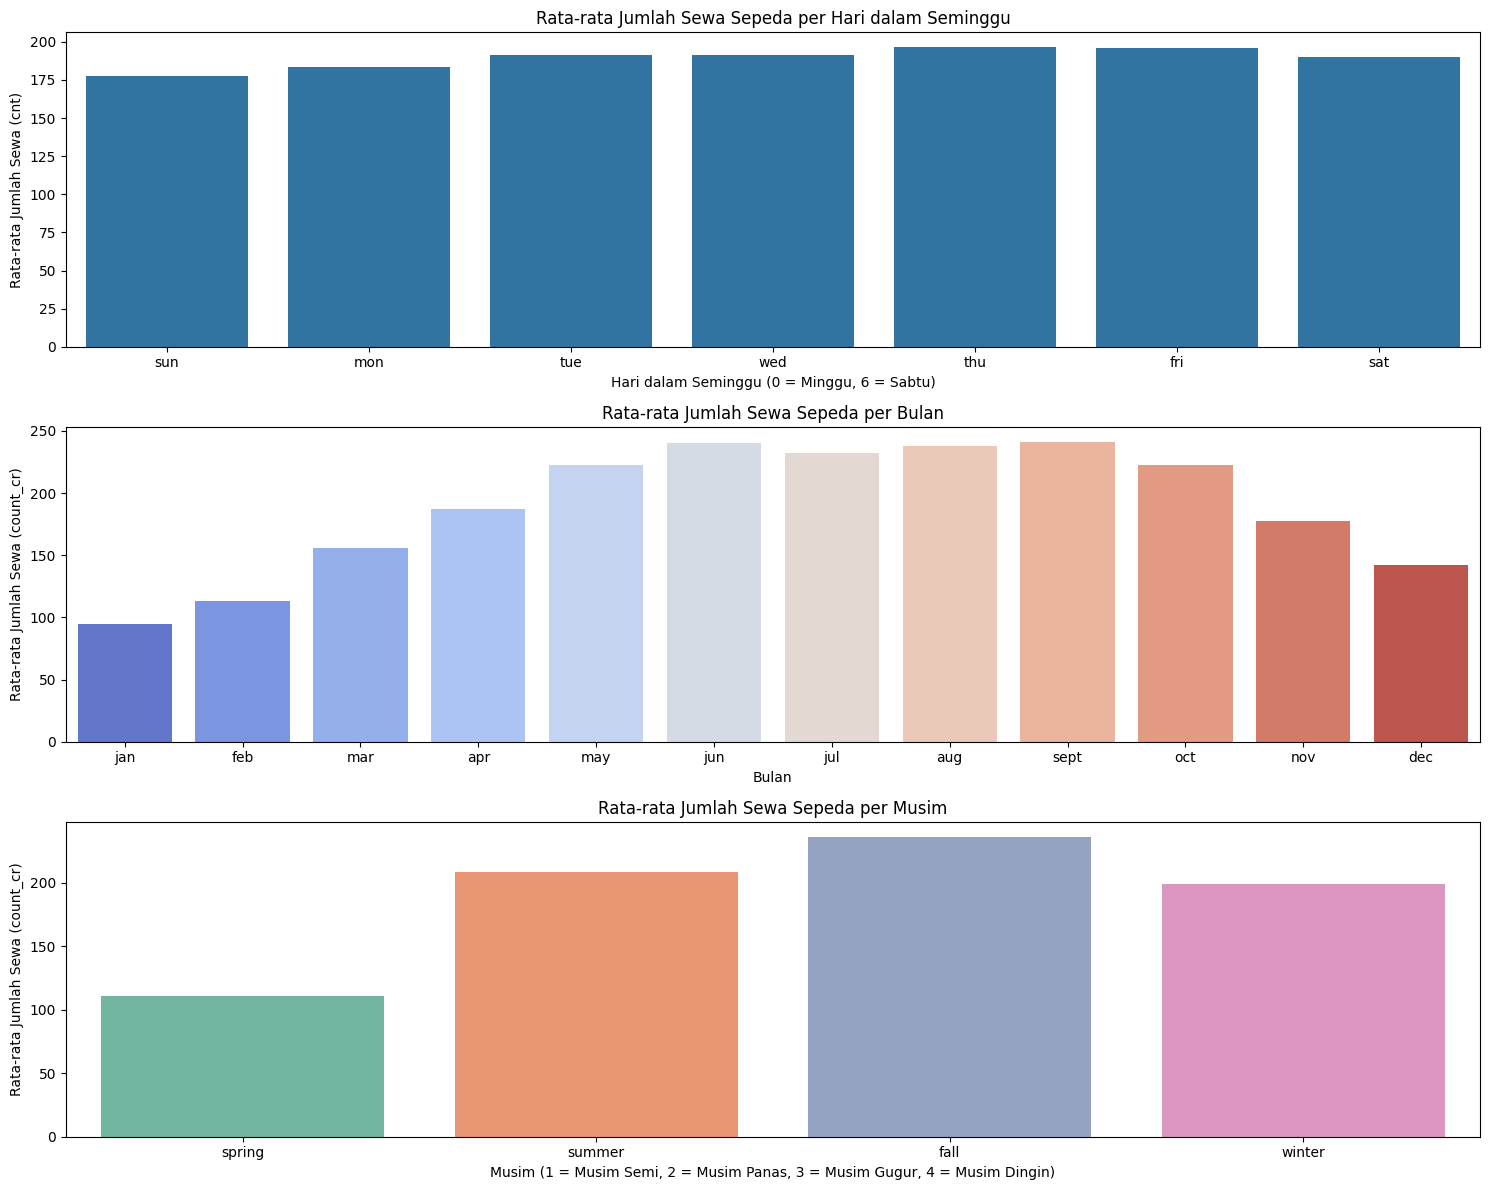

In [64]:
# Mengatur ukuran plot
plt.figure(figsize=(15, 12))

# Visualisasi 1: Rata-rata Sewa Sepeda berdasarkan Hari dalam Seminggu
plt.subplot(3, 1, 1)
sns.barplot(data=hour, x='day_of_the_week', y='count_cr', errorbar=None)
plt.title('Rata-rata Jumlah Sewa Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu (0 = Minggu, 6 = Sabtu)')
plt.ylabel('Rata-rata Jumlah Sewa (cnt)')

# Visualisasi 2: Rata-rata Sewa Sepeda berdasarkan Bulan
plt.subplot(3, 1, 2)
sns.barplot(data=hour, x='month', y='count_cr', errorbar=None, hue='month', palette='coolwarm', legend=False)
plt.title('Rata-rata Jumlah Sewa Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Sewa (count_cr)')

# Visualisasi 3: Rata-rata Sewa Sepeda berdasarkan Musim
plt.subplot(3, 1, 3)
sns.barplot(data=hour, x='season', y='count_cr', errorbar=None, hue='season', palette='Set2', legend=False)
plt.title('Rata-rata Jumlah Sewa Sepeda per Musim')
plt.xlabel('Musim (1 = Musim Semi, 2 = Musim Panas, 3 = Musim Gugur, 4 = Musim Dingin)')
plt.ylabel('Rata-rata Jumlah Sewa (count_cr)')

# Menampilkan plot
plt.tight_layout()
plt.show()

Simpulan Utama:

* Grafik menunjukkan bahwa rata-rata jumlah sewa sepeda stabil sepanjang minggu, tanpa ada hari yang menonjol secara signifikan. Namun, jumlah sewa tertinggi terjadi di bulan-bulan dari Mei hingga September, dengan puncaknya pada bulan Juni.
* Jumlah sewa sepeda menunjukkan peningkatan signifikan pada musim panas, sementara musim dingin dan musim semi mencatat jumlah sewa yang lebih rendah.
* Di bulan-bulan musim dingin (November-Desember), terjadi penurunan drastis dalam jumlah sewa, yang mengindikasikan penggunaan sepeda yang lebih rendah pada saat cuaca dingin.

Implikasi:

* Puncak sewa sepeda di bulan-bulan musim panas menunjukkan bahwa sepeda sering digunakan sebagai alat transportasi dan rekreasi selama musim dengan cuaca yang lebih hangat.
* Penting untuk menyiapkan lebih banyak sepeda dan mungkin melakukan perawatan ekstra menjelang musim semi dan musim panas untuk mengakomodasi lonjakan permintaan.
* Penurunan jumlah sewa di musim dingin mengindikasikan perlunya strategi seperti promosi atau penyediaan fasilitas yang lebih nyaman di cuaca dingin untuk meningkatkan penggunaan sepeda selama musim tersebut.

###2. Bagaimana Pengaruh Hari Kerja vs. Akhir Pekan dan Faktor Cuaca terhadap Jumlah Sewa Sepeda?

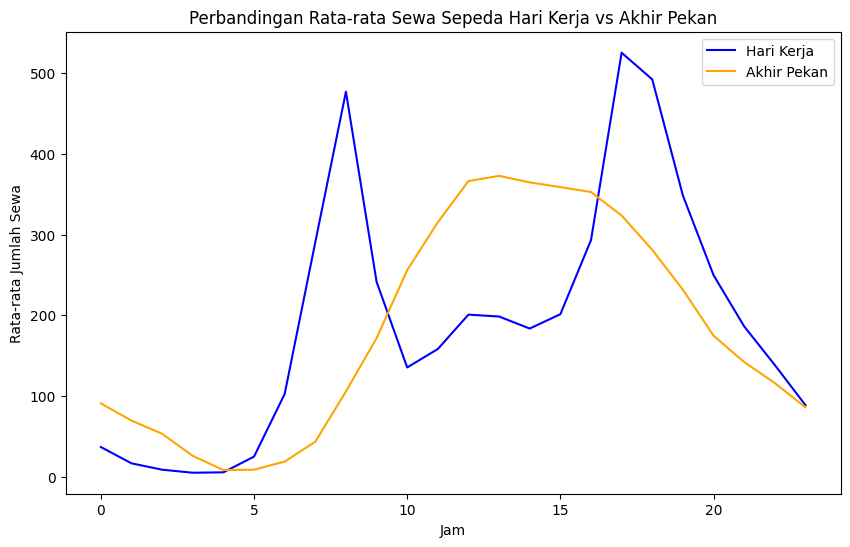

In [70]:
# Membuat dua subset: hari kerja dan akhir pekan
weekday_data = hour[hour['workingday'] == 1]
weekend_data = hour[hour['workingday'] == 0]

# Visualisasi rata-rata jumlah sewa pada hari kerja vs akhir pekan
avg_workingday = weekday_data.groupby('hour')['count_cr'].mean().reset_index()
avg_weekend = weekend_data.groupby('hour')['count_cr'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_workingday, x='hour', y='count_cr', label='Hari Kerja', color='blue')
sns.lineplot(data=avg_weekend, x='hour', y='count_cr', label='Akhir Pekan', color='orange')
plt.title('Perbandingan Rata-rata Sewa Sepeda Hari Kerja vs Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Sewa')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


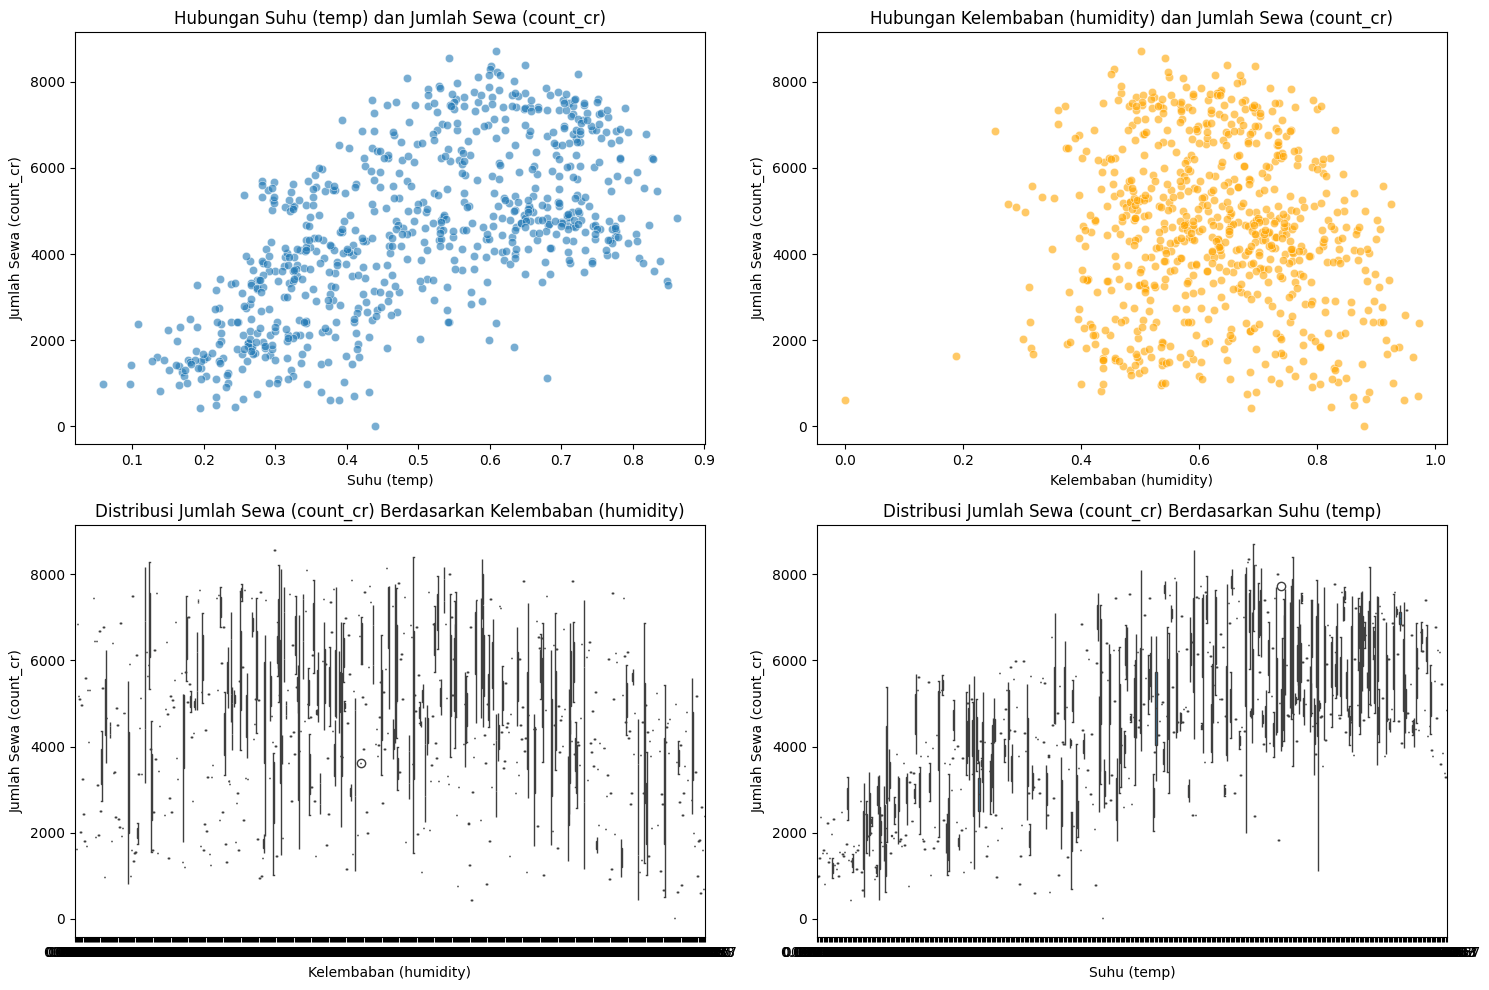

In [72]:
# Mengatur ukuran plot
plt.figure(figsize=(15, 10))

# Visualisasi 1: Scatter Plot antara Suhu dan Jumlah Sewa
plt.subplot(2, 2, 1)
sns.scatterplot(data=day, x='temp', y='count_cr', alpha=0.6)
plt.title('Hubungan Suhu (temp) dan Jumlah Sewa (count_cr)')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Sewa (count_cr)')

# Visualisasi 2: Scatter Plot antara Kelembaban dan Jumlah Sewa
plt.subplot(2, 2, 2)
sns.scatterplot(data=day, x='humidity', y='count_cr', alpha=0.6, color='orange')
plt.title('Hubungan Kelembaban (humidity) dan Jumlah Sewa (count_cr)')
plt.xlabel('Kelembaban (humidity)')
plt.ylabel('Jumlah Sewa (count_cr)')

# Visualisasi 3: Box Plot untuk menunjukkan Distribusi Jumlah Sewa berdasarkan Kelembaban
plt.subplot(2, 2, 3)
sns.boxplot(data=day, x='humidity', y='count_cr')
plt.title('Distribusi Jumlah Sewa (count_cr) Berdasarkan Kelembaban (humidity)')
plt.xlabel('Kelembaban (humidity)')
plt.ylabel('Jumlah Sewa (count_cr)')

# Visualisasi 4: Box Plot untuk menunjukkan Distribusi Jumlah Sewa berdasarkan Suhu
plt.subplot(2, 2, 4)
sns.boxplot(data=day, x='temp', y='count_cr')
plt.title('Distribusi Jumlah Sewa (count_cr) Berdasarkan Suhu (temp)')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Sewa (count_cr)')

# Menampilkan plot
plt.tight_layout()
plt.show()

Pengaruh Hari Kerja vs Akhir Pekan:
* Rata-rata Sewa Sepeda di Hari Kerja:
1. Grafik pertama menunjukkan bahwa terdapat dua puncak besar pada hari kerja, yaitu sekitar pukul 8 pagi dan pukul 5-6 sore. Hal ini mengindikasikan bahwa sepeda banyak digunakan untuk aktivitas berangkat dan pulang kerja atau sekolah.
2. Selain puncak tersebut, jumlah sewa pada siang hingga sore hari tetap signifikan, tetapi jauh lebih rendah dibandingkan dengan jam sibuk.
* Rata-rata Sewa Sepeda di Akhir Pekan:
1. Berbeda dengan hari kerja, di akhir pekan jumlah sewa sepeda cenderung lebih stabil sepanjang hari, dengan puncak sewa sekitar pukul 10 pagi hingga 4 sore.

  Ini menunjukkan bahwa sepeda lebih banyak digunakan untuk aktivitas rekreasi atau santai di akhir pekan.

Implikasi:

  * Sewa sepeda pada hari kerja mengikuti pola rutinitas harian (commuting), sementara di akhir pekan lebih difokuskan pada penggunaan rekreasi yang tersebar sepanjang hari.


Pengaruh Faktor Cuaca (Suhu dan Kelembaban):
* Pengaruh Suhu:

1. Grafik kedua menunjukkan adanya hubungan positif antara suhu dan jumlah sewa sepeda. Semakin tinggi suhu, semakin tinggi pula rata-rata jumlah sewa. Ini menunjukkan bahwa cuaca yang lebih hangat mendukung aktivitas bersepeda.
2. Grafik distribusi suhu juga menunjukkan peningkatan jumlah sewa pada suhu yang lebih tinggi, meskipun ada variabilitas pada setiap titik suhu.

* Pengaruh Kelembaban:

1. Terdapat hubungan yang kurang jelas antara kelembaban dan jumlah sewa sepeda. Meski ada sedikit kenaikan pada kelembaban sedang (sekitar 0,4 hingga 0,6), tidak ada pola yang sejelas hubungan antara suhu dan jumlah sewa.
2. Grafik distribusi menunjukkan bahwa meskipun kelembaban meningkat, variasi jumlah sewa tetap tinggi, yang menandakan bahwa kelembaban tidak secara signifikan memengaruhi keputusan pengguna sepeda.

Implikasi:

  * Suhu yang hangat meningkatkan jumlah sewa sepeda, tetapi kelembaban tampaknya tidak berdampak signifikan terhadap tren penyewaan. Pengguna lebih memilih bersepeda pada hari-hari yang lebih hangat, sedangkan perubahan kelembaban tidak terlalu mempengaruhi pola penyewaan secara drastis.


Kesimpulan Umum:

* Hari Kerja vs. Akhir Pekan: Jumlah sewa sepeda lebih tinggi pada jam sibuk hari kerja (pagi dan sore), sedangkan pada akhir pekan penggunaan sepeda lebih merata sepanjang hari.
* Cuaca: Suhu yang lebih tinggi cenderung mendorong lebih banyak orang untuk menyewa sepeda, sementara kelembaban tidak secara signifikan memengaruhi jumlah sewa.

##Analisis Lanjutan

###Clustering (Manual Grouping dan Binning)

1. Manual Grouping

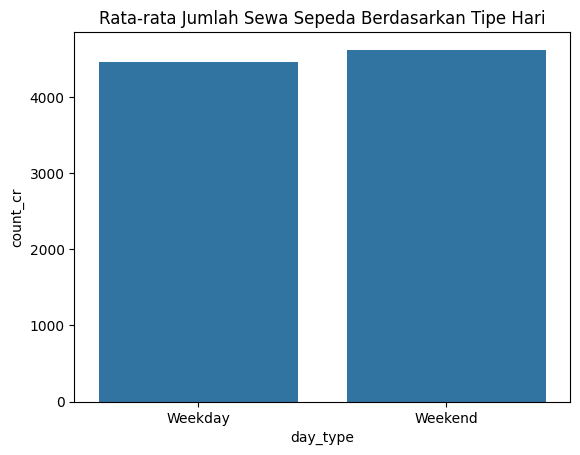

In [81]:
hour['day_type'] = day_df['weekday'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
grouped_data = day.groupby('day_type')['count_cr'].mean().reset_index()
sns.barplot(data=grouped_data, x='day_type', y='count_cr')
plt.title('Rata-rata Jumlah Sewa Sepeda Berdasarkan Tipe Hari')
plt.show()


2. Binning Suhu

<ipython-input-83-f2e483de2ca2>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_group_data = day.groupby('temp_group')['count_cr'].mean().reset_index()
<ipython-input-83-f2e483de2ca2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_group_data, x='temp_group', y='count_cr', palette='coolwarm')


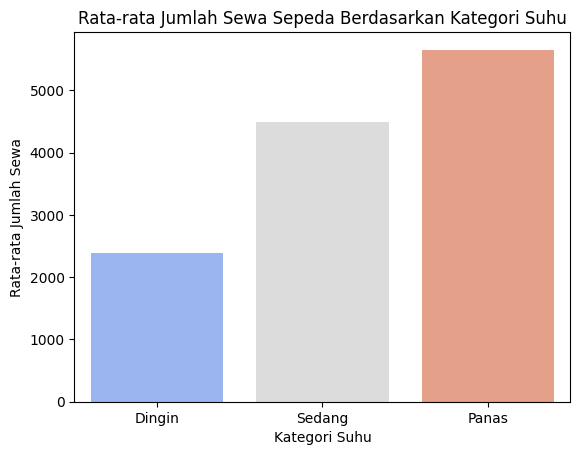

In [83]:
bins = [0, 0.3, 0.6, 1]  # Define bins for temperature
labels = ['Dingin', 'Sedang', 'Panas']
day['temp_group'] = pd.cut(day['temp'], bins=bins, labels=labels)

temp_group_data = day.groupby('temp_group')['count_cr'].mean().reset_index()
sns.barplot(data=temp_group_data, x='temp_group', y='count_cr', palette='coolwarm')
plt.title('Rata-rata Jumlah Sewa Sepeda Berdasarkan Kategori Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Rata-rata Jumlah Sewa')
plt.show()

**Insight:**
- Hari Kerja vs. Akhir Pekan Tidak Berpengaruh Signifikan: Data menunjukkan bahwa tidak ada perbedaan yang jelas antara jumlah sewa sepeda pada hari kerja dan akhir pekan. Ini mungkin karena faktor-faktor lain seperti cuaca, waktu dalam sehari, atau acara khusus yang lebih dominan mempengaruhi jumlah sewa.
- Cuaca Hangat Meningkatkan Sewa Sepeda: Data menunjukkan bahwa cuaca yang lebih hangat secara signifikan meningkatkan jumlah sewa sepeda. Hal ini mungkin karena orang lebih cenderung bersepeda saat cuaca nyaman dan menyenangkan.

## Conclusion

1. Pola Sewa Sepeda Berdasarkan Waktu (Hari, Bulan, Musim):

- Jumlah sewa sepeda menunjukkan variasi yang jelas sepanjang tahun, dengan peningkatan penggunaan selama bulan-bulan hangat (Mei hingga September), terutama di musim panas. Sebaliknya, musim dingin mencatat penurunan yang signifikan.
- Pola ini mengindikasikan bahwa cuaca berpengaruh besar terhadap minat bersepeda, di mana pengguna lebih cenderung menggunakan sepeda untuk rekreasi dan transportasi selama musim yang nyaman.
- Penyedia layanan sewa sepeda harus mempersiapkan persediaan sepeda dan perawatan ekstra saat mendekati musim semi dan musim panas untuk mengakomodasi permintaan yang lebih tinggi.

2. Pengaruh Hari Kerja vs. Akhir Pekan dan Faktor Cuaca terhadap Jumlah Sewa:

- Di hari kerja, pola sewa sepeda menunjukkan dua puncak aktivitas utama pada pagi dan sore hari, yang menandakan penggunaannya untuk perjalanan ke tempat kerja atau sekolah. Pada akhir pekan, penggunaan sepeda lebih merata sepanjang hari, lebih menunjukkan kegiatan rekreasi.
- Faktor cuaca juga berpengaruh, di mana suhu hangat secara signifikan meningkatkan penggunaan sepeda, sementara tingkat kelembaban tidak memiliki dampak yang jelas terhadap jumlah sewa.
- Kesimpulan ini menunjukkan perlunya perencanaan penyewaan yang mempertimbangkan cuaca dan jenis hari. Misalnya, promosi bisa difokuskan pada hari akhir pekan dan musim panas untuk mendorong lebih banyak orang menyewa sepeda untuk rekreasi.

In [ ]:
day.to_csv('day.csv', index=False)
hour.to_csv('hour.csv', index=False)